In [2]:
import os
from PIL import Image
import numpy  as np
import tensorflow as tf
import keras
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [1]:
# 自分のマイドライブにマウントする
from google.colab import drive
drive.mount('/content/drive/')

ERROR! Session/line number was not unique in database. History logging moved to new session 59
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# カレントディレクトリの変更
os.chdir('/content/drive/My Drive/')
# カレントディレクトリの取得
print(os.getcwd())

/content/drive/My Drive


In [0]:
!mkdir sprint18
!mv /content/drive/'My Drive'/'Colab Notebooks'/sprint18-work.ipynb /content/drive/'My Drive'/sprint18/

In [0]:
!pip install kaggle

In [0]:
os.chdir('/content/')
# カレントディレクトリの取得
print(os.getcwd())

/content


In [0]:
!mkdir .kaggle

In [0]:
!ls -a

./  ../  .config/  drive/  .ipynb_checkpoints/  .kaggle/  sample_data/


In [0]:
import json

token = {"username":"yukishibata","key":"1a86b73f618f9dd5b98fe6a31f6f4ff4"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!chmod 600 /content/.kaggle/kaggle.json
!ls -a .kaggle

In [0]:
!mkdir /root/.kaggle/
!cp -R /content/.kaggle/kaggle.json /root/.kaggle/

In [0]:
!ls -a /root/.kaggle/

In [4]:
# カレントディレクトリの変更
os.chdir('/content/drive/My Drive/sprint18/')
# カレントディレクトリの取得
print(os.getcwd())

/content/drive/My Drive/sprint18


In [0]:
# kaggleのコンペからダウンロード
!kaggle competitions download -c tgs-salt-identification-challenge

  0% 0.00/264k [00:00<?, ?B/s]
100% 264k/264k [00:00<00:00, 15.5MB/s]
  0% 0.00/322k [00:00<?, ?B/s]
100% 322k/322k [00:00<00:00, 21.3MB/s]
 66% 25.0M/37.9M [00:00<00:00, 86.5MB/s]
100% 37.9M/37.9M [00:00<00:00, 123MB/s] 
  0% 0.00/922k [00:00<?, ?B/s]
100% 922k/922k [00:00<00:00, 60.9MB/s]
 94% 39.0M/41.4M [00:00<00:00, 48.3MB/s]
100% 41.4M/41.4M [00:00<00:00, 65.1MB/s]
 97% 210M/217M [00:01<00:00, 135MB/s]
100% 217M/217M [00:01<00:00, 114MB/s]
 94% 153M/163M [00:01<00:00, 136MB/s]
100% 163M/163M [00:01<00:00, 133MB/s]


In [0]:
!unzip /content/drive/'My Drive'/sprint18/train.zip

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: images/b012e9ebb0.png   
  inflating: images/d3034e7a60.png   
  inflating: images/ae2ef70d51.png   
  inflating: images/1af44a9db0.png   
  inflating: images/41cfd4b320.png   
  inflating: images/853e89d0d3.png   
  inflating: images/2a484baa26.png   
  inflating: images/92e617896e.png   
  inflating: images/b70f0ab0c2.png   
  inflating: images/e8757626a1.png   
  inflating: images/6a3d92ce59.png   
  inflating: images/127ef4105f.png   
  inflating: images/d21012f5c1.png   
  inflating: images/1cb9549d2c.png   
  inflating: images/e030bdae65.png   
  inflating: images/0cf7155eb6.png   
  inflating: images/badb3ea766.png   
  inflating: images/9bd58061d6.png   
  inflating: images/2b1e71c2a3.png   
  inflating: images/28d42de29f.png   
  inflating: images/10833853b3.png   
  inflating: images/ef13247eed.png   
  inflating: images/bce104494c.png   
  inflating: images/c8ce151a18.png   
  inflating: images/302ea1ac81.png   
  inflating: image

In [0]:
!mkdir train/
!mv ./images ./train/
!mv ./masks ./train/

In [0]:
!mkdir test/
!unzip /content/drive/'My Drive'/sprint18/test.zip
!rm train.zip
!rm test.zip

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: images/187ecc32d5.png   
  inflating: images/54538419f5.png   
  inflating: images/93614d4b95.png   
  inflating: images/50a91adce8.png   
  inflating: images/97d23cea10.png   
  inflating: images/ca04c19c0b.png   
  inflating: images/d168218bac.png   
  inflating: images/a670e833a4.png   
  inflating: images/a964a0f499.png   
  inflating: images/371bf59030.png   
  inflating: images/fc74f77bae.png   
  inflating: images/f63dc1e3be.png   
  inflating: images/b807539a5f.png   
  inflating: images/1dfcbf4bca.png   
  inflating: images/a971d2ae53.png   
  inflating: images/4ad823e2d3.png   
  inflating: images/85a9687a4f.png   
  inflating: images/da5b430ecd.png   
  inflating: images/b1a2903d1c.png   
  inflating: images/70958cacd4.png   
  inflating: images/2093e5c98e.png   
  inflating: images/f2c108fd0b.png   
  inflating: images/56b0d83562.png   
  inflating: images/09aa9bde24.png   
  inflating: images/3cb4906b6e.png   
  inflating: image

In [0]:
!mv ./images ./test/
!mkdir compe/
!unzip ./competition_data.zip  -d compe/
!rm competition_data.zip

ストリーミング出力は最後の 5000 行に切り捨てられました。
  inflating: compe/competition_data/train/masks/851a37ac37.png  
  inflating: compe/__MACOSX/competition_data/train/masks/._851a37ac37.png  
  inflating: compe/competition_data/train/masks/6010b9b84d.png  
  inflating: compe/__MACOSX/competition_data/train/masks/._6010b9b84d.png  
  inflating: compe/competition_data/train/masks/f64190c47e.png  
  inflating: compe/__MACOSX/competition_data/train/masks/._f64190c47e.png  
  inflating: compe/competition_data/train/masks/ec3130dd0b.png  
  inflating: compe/__MACOSX/competition_data/train/masks/._ec3130dd0b.png  
  inflating: compe/competition_data/train/masks/894b9ae774.png  
  inflating: compe/__MACOSX/competition_data/train/masks/._894b9ae774.png  
  inflating: compe/competition_data/train/masks/6a57dfd211.png  
  inflating: compe/__MACOSX/competition_data/train/masks/._6a57dfd211.png  
  inflating: compe/competition_data/train/masks/9b656c339a.png  
  inflating: compe/__MACOSX/competition_data/train/masks/

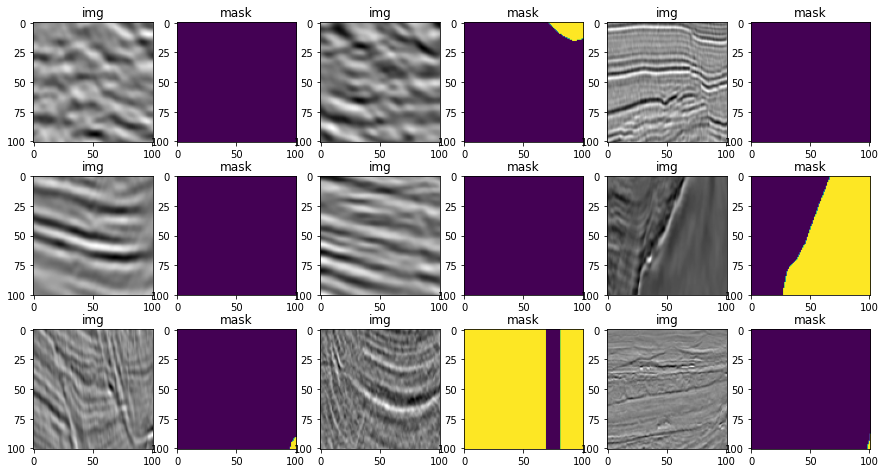

(101, 101, 3)


In [0]:
# train
# リスト化
# images
path_images = './train/images' 
img_train = sorted(os.listdir(path_images))
# masks
path_masks = './train/masks' 
mask_train = sorted(os.listdir(path_masks))

plt.subplots(3,6,figsize=(15, 8))
for n in range(9):
  # 画像確認
  # image
  plt.subplot(3, 6, 2*n+1)
  img = Image.open('./train/images/' + img_train[n])
  img = np.array(img)
  plt.imshow(img)
  plt.title('img')
  # mask
  plt.subplot(3, 6, 2*(n+1))
  mask = Image.open('./train/masks/' + mask_train[n])
  mask = np.array(mask)
  plt.imshow(mask)
  plt.title('mask')
plt.show()
# shape確認
print(img.shape)

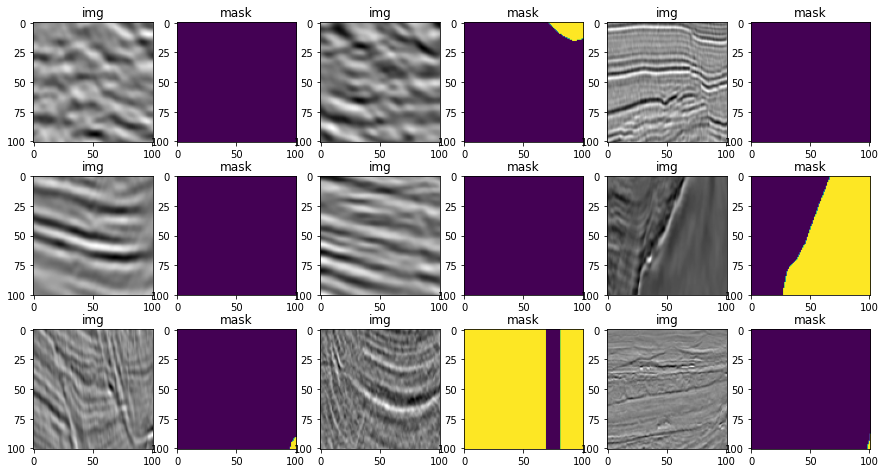

(101, 101, 3)


In [0]:
# compe
# リスト化
# images
path_images = './compe/competition_data/train/images'
img_train = sorted(os.listdir(path_images))
# masks
path_masks = './compe/competition_data/train/masks'
mask_train = sorted(os.listdir(path_masks))

plt.subplots(3,6,figsize=(15, 8))
for n in range(9):
  # 画像確認
  # image
  plt.subplot(3, 6, 2*n+1)
  img = Image.open('./compe/competition_data/train/images/' + img_train[n])
  img = np.array(img)
  plt.imshow(img)
  plt.title('img')
  # mask
  plt.subplot(3, 6, 2*(n+1))
  mask = Image.open('./compe/competition_data/train/masks/' + mask_train[n])
  mask = np.array(mask)
  plt.imshow(mask)
  plt.title('mask')
plt.show()
# shape確認
print(img.shape)

### compeとtrainは同じ　→　trainファイルのデータを使用

In [0]:
# gitのコピー
!mkdir gitcode
!git clone https://github.com/zhixuhao/unet ./gitcode/

Cloning into './gitcode'...
remote: Enumerating objects: 394, done.
remote: Total 394 (delta 0), reused 0 (delta 0), pack-reused 394
Receiving objects: 100% (394/394), 44.92 MiB | 21.47 MiB/s, done.
Resolving deltas: 100% (79/79), done.
Checking out files: 100% (253/253), done.


In [0]:
# ファイル名などをgitと同じにする
# オリジナルデータの移動
!mkdir data_origin
!mv ./gitcode/data/ ./data_origin/

In [0]:
# 使用するデータの移動
!mkdir ./gitcode/data/

In [0]:
!mkdir ./gitcode/data/membrane/
!mv ./gitcode/data/train/ ./gitcode/data/membrane/
!mv ./gitcode/data/test/ ./gitcode/data/membrane/

In [0]:
!mkdir ./gitcode/data/membrane/aug/

In [0]:
!mv ./gitcode/data/membrane/test/images ./gitcode/data/membrane/

In [0]:
!rmdir ./gitcode/data/membrane/test/

In [0]:
!mv ./gitcode/data/membrane/images  ./gitcode/data/membrane/test

In [0]:
# gitcodeへ移動
os.chdir('/content/drive/My Drive/sprint18/gitcode')

In [0]:
!mv ./data/membrane/train/images ./data/membrane/train/image
!mv ./data/membrane/train/masks ./data/membrane/train/label

In [0]:
# gitで使用していた画像サイズの確認
# train
path_img = '../data_origin/membrane/train/image'
img = sorted(os.listdir(path_img))
# masks
path_masks = '../data_origin/membrane/train/label'
mask = sorted(os.listdir(path_masks))
# test
path_test = '../data_origin/membrane/test'
test = sorted(os.listdir(path_test))

# image
img = Image.open('../data_origin/membrane/train/image/' + img[0])
img = np.array(img)
print(img.shape)
# mask
mask = Image.open('../data_origin/membrane/train/label/' + mask[0])
mask = np.array(mask)
print(mask.shape)
# test
test = Image.open('../data_origin/membrane/test/' + test[0])
test = np.array(test)
print(test.shape)

(512, 512)
(512, 512)
(512, 512)


In [0]:
# main.py
# test名に合わせてdata.pyのtestgeneを修正
# predのデータ型はuint８に修正したが警告はでる
!python main.py

Using TensorFlow backend.





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/content/drive/My Drive/sprint18/gitcode/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1
Found 4000 images belonging to 1 classes.
Found 4000 images belonging to 1 classes.


2020-03-23 09:08:45.045582: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200000000 Hz
2020-03-23 09:08:45.045899: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x176ca00 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-03-23 09:08:45.045922: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-03-23 

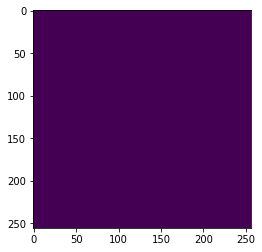

In [0]:
# pred
path_pred = './data/membrane/test_pred'
pred = sorted(os.listdir(path_pred))

# 画像確認
pred = Image.open('./data/membrane/test_pred/' + pred[0])
pred = np.array(pred)
plt.imshow(pred)
plt.show()

In [0]:
print(pred)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# 【問題2】コードリーディング
論文[1]に目を通した上で、上記実装のコードリーディングを行ってください。

* unet  
model.py、エンコードとデコード✖︎５層、各層でスキップコネクション

* データ前処理  
data.py、画像のサイズなどが異なっても学習できるように前処理が行われる、マスクと画像を同時に生成できる  
また、trainはtrainGenerator、testはtestGeneratorで処理。

In [5]:
pwd

'/content/drive/My Drive/sprint18'